# Домашнее задание 1. Сбор данных

In [2]:
import vk
import folium
import pandas
import matplotlib.pyplot as plt
import seaborn
import datetime
%matplotlib inline

In [3]:
ACCESS_TOKEN = '9bd4a15b7798b9ad2b5d031242d608a42fc6609b51f8a74730fba73ea00e50139ce5c74865a41e0dcdc0b'
vk_api = vk.API(session=vk.Session(access_token=ACCESS_TOKEN), v='5.62')

In [4]:
def get_place_info(vkapi, idx=5000):
    raw_places = vkapi.places.getById(places=','.join(map(str, xrange(1, idx + 1))))
    df_places = pandas.DataFrame(raw_places)
    return df_places

In [5]:
places = get_place_info(vk_api)

Предположим, что мы хотим понять несколько фактов о выборке объектов с id от 1 до 5000.
Помогите нам это сделать.
А вот и сами факты:
* Провизуализируйте на карте все объекты которые находятся в Москве?

In [6]:
from folium.plugins import MarkerCluster

# эти констнаты взяты из лекции
MOS_CENTER = (55.750475, 37.619020)
MOS_MIN_LAT, MOS_MAX_LAT = 55.564141, 55.908930
MOS_MIN_LON, MOS_MAX_LON = 37.344362, 37.879945

moscow_map = folium.Map(location=MOS_CENTER, zoom_start=10, control_scale=True)

moscow_places = places[(MOS_MIN_LAT <= places['latitude']) & (places['latitude'] <= MOS_MAX_LAT) &
                       (MOS_MIN_LON <= places['longitude']) & (places['longitude'] <= MOS_MAX_LON)]
marker_cluster = MarkerCluster(moscow_places[['latitude', 'longitude']].values)
marker_cluster.add_to(moscow_map)
moscow_map

*  Где больше объектов, в центре или на окраине?

In [7]:
MOS_CENTER_MAX_LAT = 55.7725  # широта самой северной точки Садового кольца (см. Википедию)
GARDEN_RING_RADIUS = MOS_CENTER_MAX_LAT - MOS_CENTER[0]  # в градусах

MOS_CENTER_MIN_LAT = MOS_CENTER[0] - GARDEN_RING_RADIUS
MOS_CENTER_MIN_LON = MOS_CENTER[1] - GARDEN_RING_RADIUS
MOS_CENTER_MAX_LON = MOS_CENTER[1] + GARDEN_RING_RADIUS

moscow_center_places = places[(MOS_CENTER_MIN_LAT <= places['latitude']) &
                              (places['latitude'] <= MOS_CENTER_MAX_LAT) &
                              (MOS_CENTER_MIN_LON <= places['longitude']) &
                              (places['longitude'] <= MOS_CENTER_MAX_LON)]

moscow_places_total = len(moscow_places)
moscow_center_places_count = len(moscow_center_places)
print('{0:3d} объектов всего\n{1:3d} объектов в центре\n{2:3d} объектов вне центра (на окраине)'.
      format(moscow_places_total, moscow_center_places_count, moscow_places_total - moscow_center_places_count))

637 объектов всего
166 объектов в центре
471 объектов вне центра (на окраине)


* Посчитайте количество объектов разного типа. Объектов какого типа больше в данной выборке?

In [8]:
types_count = places.groupby('type')[['type']].count()
types_count

,type
type,
3,725
4,1296


* Постройте распределение.

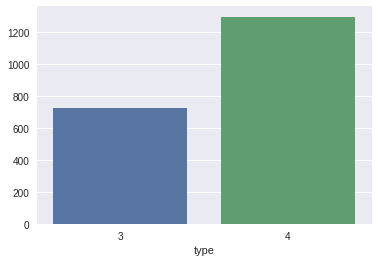

In [9]:
seaborn.barplot(x=types_count.index, y=types_count['type'].values)

* Посчитайте распределение числа чекинов по всей выборке.

In [10]:
checkins_count = places.groupby(['type', 'checkins'])['checkins'].count()
checkins_count

type  checkins
3     0           179
      1            85
      2            70
      3            45
      4            32
      5            27
      6            32
      7            24
      8            12
      9            14
      10           17
      11           10
      12           12
      13           10
      14            6
      15            5
      16            3
      17            4
      18            6
      19            6
      20            2
      21            5
      22            2
      23            5
      24            2
      25            2
      26            3
      27            1
      28            3
      29            3
                 ... 
4     184           1
      185           2
      187           1
      191           2
      192           1
      197           1
      202           1
      209           1
      211           1
      213           1
      215           1
      216           1
      241           1
      270        

* Визуализируйте его.

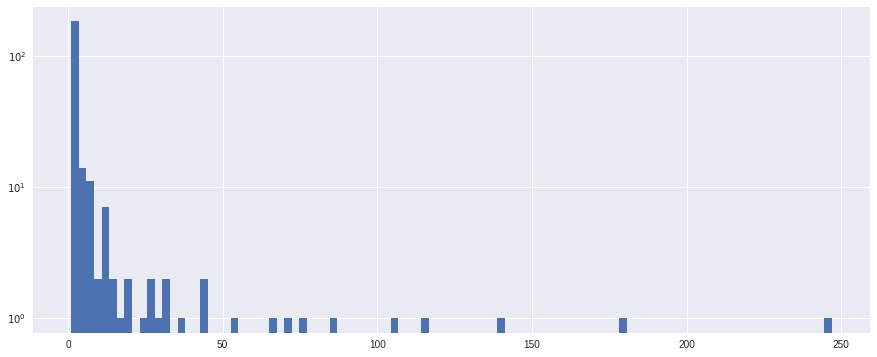

In [11]:
fig, axes = plt.subplots(figsize=(15, 6))
checkins_count.hist(ax=axes, bins=100)
axes.set_yscale('log')  # пришлось сделать логарифмическую шкалу, чтобы маленькие величины были более различимы

* Постройте box plot по числу чекинов для каждого типа объектов.

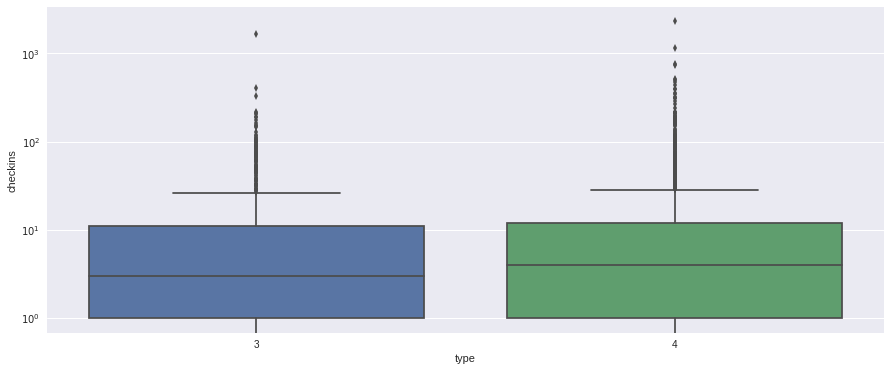

In [12]:
fig, axes = plt.subplots(figsize=(15, 6))
checkins_by_type = places[['type', 'checkins']]
seaborn.boxplot(checkins_by_type.type, checkins_by_type.checkins)
axes.set_yscale('log')  # аналгично, пришлось сделать логарифмическую шкалу

* Преобразуйте поле created в datetime.

In [13]:
from datetime import datetime

created_as_datetime = places['created'].apply(lambda created: datetime.fromtimestamp(created))

* Как давно были созданы объекты? Сколько объектов существует больше года?

In [14]:
now = datetime.now()
try:
    year_ago = now.replace(year=now.year - 1)
except ValueError:  # 29 февраля
    year_ago = now.replace(day=28, year=now.year - 1)
created_as_datetime[created_as_datetime < year_ago].count()

2021

Не забудьте сохранить данную выборку, в будущем она вам понадобится.

In [15]:
places.to_csv('hw1_vk_places.csv', encoding='utf-8')